In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

## Получение данных и их овервью

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [348]:
df_train = pd.read_csv("/content/drive/MyDrive/datasets/kaggle_ingostr/insclass_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/datasets/kaggle_ingostr/insclass_test.csv")

* variable_1 - агрегированный коэффициент 2/2/2.2 бонус-малус (повышающий или понижающий стоимость полиса в зависимости от аварийности в предыдущие периоды);
* variable_2 - индикатор расторжения договора по инициативе страхователя (клиента);
variable_3 - индикатор расторжения договора по 
инициативе страховщика (страховой компании);
* variable_4 - идентификатор года выпуска транспортного средства;
* variable_5 - идентификатор страны - производителя транспортного средства;
* variable_6 - мощность двигателя в лошадиных силах;
* variable_7 - объем двигателя в куб. см;
* variable_8 - идентификатор стороны расположения руля (левый или правый);
* variable_9 - пробег транспортного средства, покрываемый гарантией производителя;
* variable_10 - индикатор действия гарантии на транспортное средство;
* variable_11 - "мультидрайв" - индикатор допуска к управлению транспортным средством более одного водителя;
* variable_12 - возраст транспортного средства (в мес.);
* variable_13 - возраст водителя с максимальным стажем;
* variable_14 - коэффициент возраст-стаж;
* variable_15 - коэффициент краткосрочности;
* variable_16 - коэффициент мощности;
* variable_17 - коэффициент "мультидрайв";
* variable_18 - территориальный коэффициент;
* variable_19 - коэффициент "КНДР";
* variable_20 - идентификатор канала продаж;
* variable_21 - марка транспортного средства;
* variable_22 - модель транспортного средства;
* variable_23 - индикатор отечественных транспортных средств;
* variable_24 - пол водителя с максимальным коэффициентом "возраст-стаж";
* variable_25 - индикатор пролонгации;
* variable_26 - индикатор совпадения собственника транспортного средства и водителя;
* variable_27 - стаж водителя с максимальным коэффициентом "возраст-стаж";
* variable_28 - тип транспортного средства;
* target - равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае.



In [ ]:
df_train.head()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,target
0,w200,0,0,14,q2,98.0,NaN,0.0,NaN,0,0,166.266987,49.041674,80.985224,NaN,98.648082,80.985224,80.985224,127.113159,C,j2,h45,0,0.0,0,1,19.323463,t1,0
1,w160,0,0,7,q11,106.0,NaN,0.0,NaN,0,0,80.338555,82.756867,80.985224,NaN,118.116608,80.985224,38.704257,148.905712,C,j33,h234,0,1.0,0,1,41.177900,t1,0
2,w200,0,0,4,q3,123.0,NaN,0.0,NaN,0,0,38.519899,35.842308,80.985224,NaN,162.514016,80.985224,273.413449,154.244863,B,j12,h28,0,0.0,0,1,3.614395,t1,0
3,w200,0,0,9,q3,102.0,NaN,0.0,NaN,0,0,109.845800,70.549602,80.985224,NaN,118.116608,80.985224,80.985224,131.067787,C,j12,h64,0,1.0,0,0,49.041674,t1,0
4,w200,0,0,18,q20,117.0,NaN,0.0,NaN,0,0,224.168209,42.499789,80.985224,NaN,118.116608,80.985224,118.116608,131.067787,C,j111,h991,0,1.0,0,0,17.909612,t1,0


## Work with data

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(df_train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(df_test.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [349]:
df_train.drop(columns=['variable_7','variable_9','variable_15','variable_3'],inplace=True)
df_test.drop(columns=['variable_7','variable_9','variable_15','variable_3'],inplace=True)

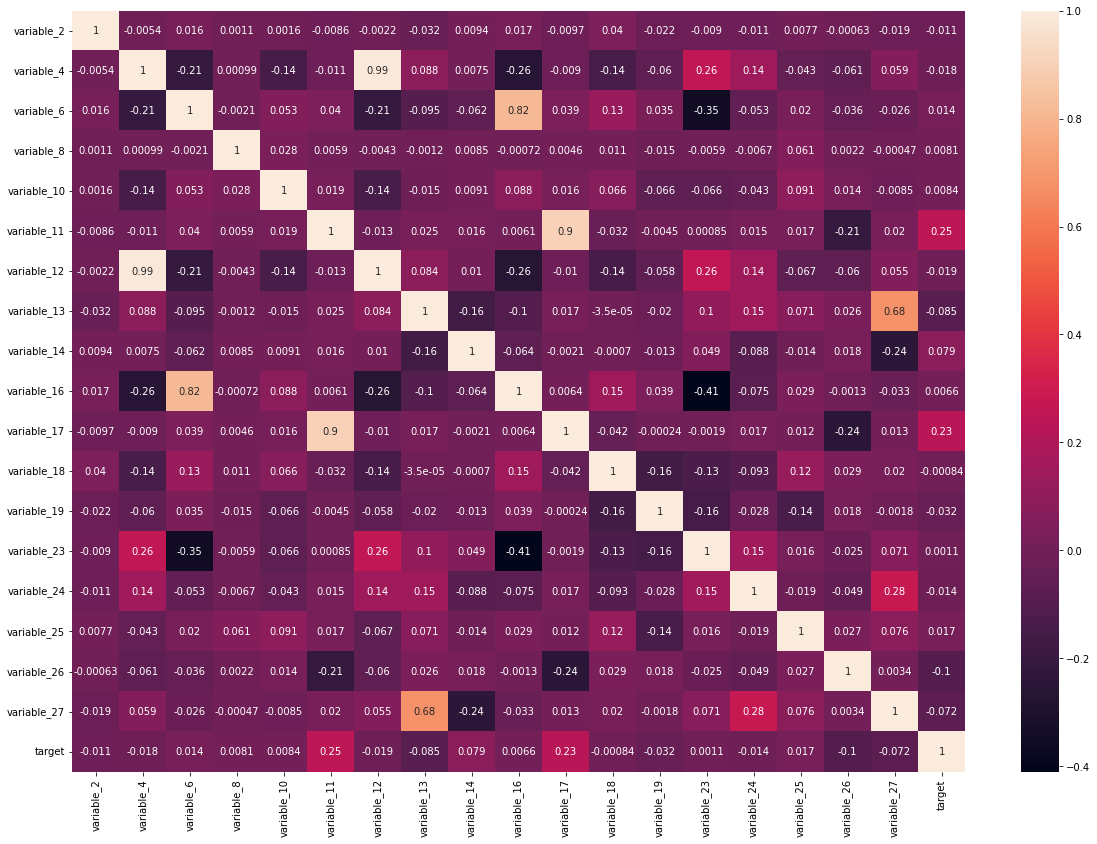

In [16]:
figure = plt.figure(figsize=(20,14))
sns.heatmap(df_train.corr(),annot=True)

In [15]:
df_train.corr().target.sort_values()

variable_26   -0.104742
variable_13   -0.084571
variable_27   -0.072044
variable_19   -0.031780
variable_12   -0.018611
variable_4    -0.018179
variable_24   -0.014070
variable_2    -0.011368
variable_18   -0.000841
variable_23    0.001099
variable_16    0.006643
variable_8     0.008082
variable_10    0.008419
variable_6     0.014082
variable_25    0.016706
variable_14    0.079209
variable_17    0.232177
variable_11    0.249325
target         1.000000
Name: target, dtype: float64

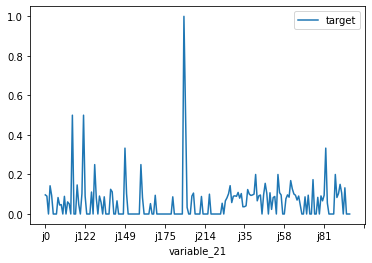

In [ ]:
df_train[['variable_21','target']].groupby('variable_21').mean().plot()

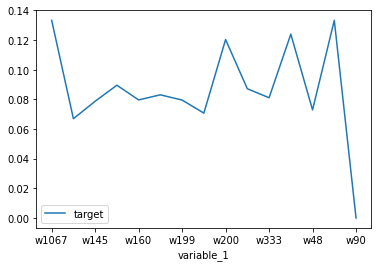

In [ ]:
df_train[['variable_1','target']].groupby('variable_1').mean().plot()

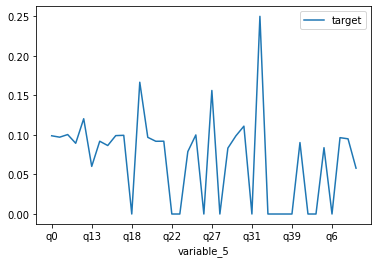

In [ ]:
df_train[['variable_5','target']].groupby('variable_5').mean().plot()

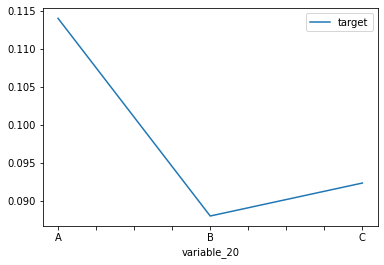

In [ ]:
df_train[['variable_20','target']].groupby('variable_20').mean().plot()

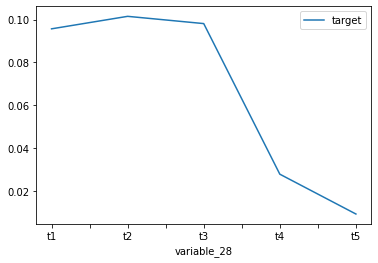

In [ ]:
df_train[['variable_28','target']].groupby('variable_28').mean().plot()

In [350]:
# фичи 11 и 17 сильно зависят, поэтому оставим только бинарную фичу variable 11
df_train.drop(columns=['variable_17'],inplace=True)
df_test.drop(columns=['variable_17'],inplace=True)

In [22]:
df_train[['variable_4','variable_12']]

,variable_4,variable_12
0,14,166.266987
1,7,80.338555
2,4,38.519899
3,9,109.845800
4,18,224.168209
...,...,...
151401,3,13.635261
151402,6,68.071719
151403,7,76.689904
151404,3,NaN


In [27]:
print(pd.isna(df_train.variable_12).any())
print(pd.isna(df_train.variable_4).any())

True
False


In [351]:
# также коррелируют 12 и 4. Дропнем 12, так как там есть значения nan, а в 4 - нет
df_train.drop(columns=['variable_12'],inplace=True)
df_test.drop(columns=['variable_12'],inplace=True)

In [32]:
df_train[['variable_16','variable_6']]

,variable_16,variable_6
0,98.648082,98.0
1,118.116608,106.0
2,162.514016,123.0
3,118.116608,102.0
4,118.116608,117.0
...,...,...
151401,162.514016,123.0
151402,162.514016,123.0
151403,214.256572,158.0
151404,98.648082,82.0


In [34]:
print(pd.isna(df_train.variable_16).sum())
print(pd.isna(df_train.variable_6).sum())
print(df_train.corr().target)

12
111
variable_2    -0.011368
variable_4    -0.018179
variable_6     0.014082
variable_8     0.008082
variable_10    0.008419
variable_11    0.249325
variable_13   -0.084571
variable_14    0.079209
variable_16    0.006643
variable_18   -0.000841
variable_19   -0.031780
variable_23    0.001099
variable_24   -0.014070
variable_25    0.016706
variable_26   -0.104742
variable_27   -0.072044
target         1.000000
Name: target, dtype: float64


In [352]:
# также коррелируют 16 и 6. Дропнем 16, так как он сильнее коррелирует с таргетом
df_train.drop(columns=['variable_16'],inplace=True)
df_test.drop(columns=['variable_16'],inplace=True)

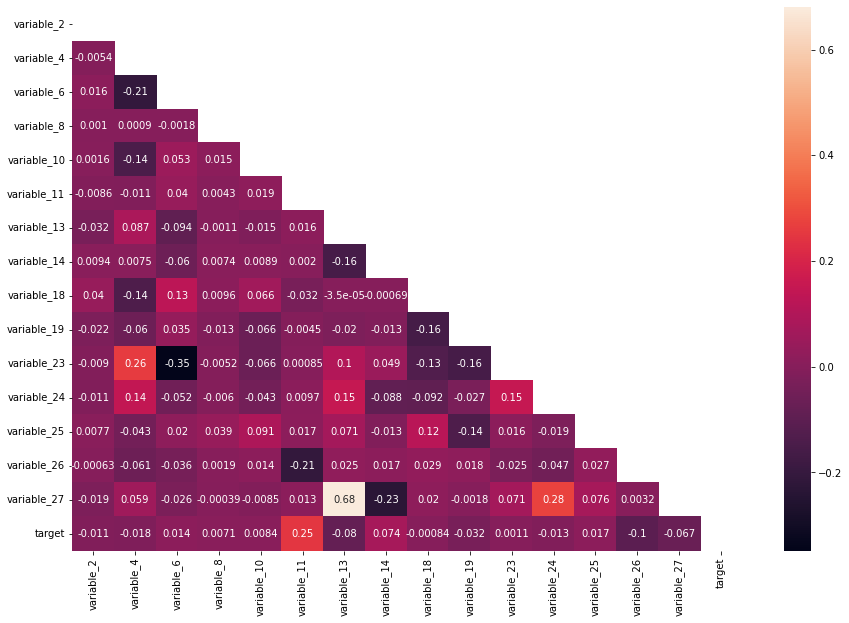

In [39]:
matrix = np.triu(df_train.corr())
figure = plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True,mask=matrix)

In [353]:
# df_train.variable_8.iloc[df_train.variable_8 == ] = 0
df_train.loc[((df_train.variable_8 != 0) & (df_train.variable_8 != 1)), 'variable_8'] = 0

In [354]:
df_train.loc[((df_train.variable_24 != 0) & (df_train.variable_24 != 1)), 'variable_24'] = 0

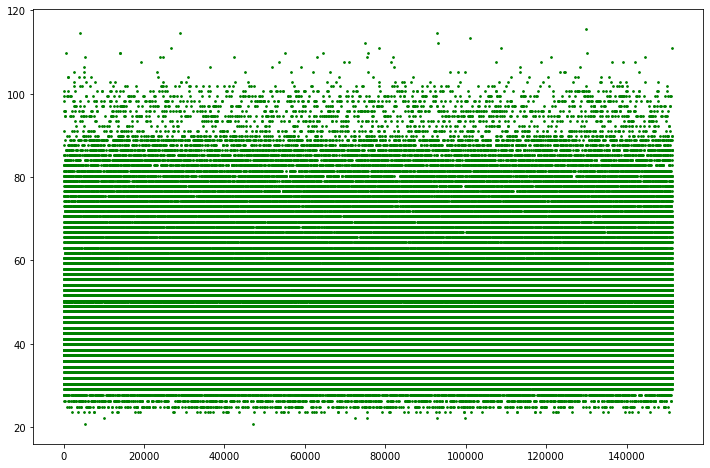

In [92]:
fig = plt.figure(figsize=(12,8))
plt.scatter(range(0,len(df_train)),df_train.variable_13,s=3,c='g')

In [333]:
num_vars = [var for var in df_train.columns if df_train[var].dtype != "O"][:-1]

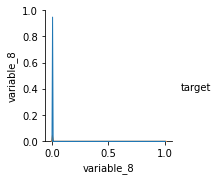

In [132]:
sns.pairplot(df_train[['variable_8','target']],hue='target')

In [117]:
df_train.variable_18.unique()

array([ 80.98522408,  38.70425666, 273.41344923, 118.11660822,
       139.40184683,  51.02723797,  98.64808216, 162.51401578,
        28.1305923 ,  19.28740043, 340.04616336, 305.79173437,
       187.46262515,  65.11601023, 242.90421749, 214.25657207,
       376.18348742, 109.16441381,  23.49397787,  57.84994687])

In [355]:
def WorkOnNan(df):
    for col in df.columns:
        if pd.isna(df[col]).any():
            if (df[col].dtype == np.float64):
                df[col].fillna(df[col].mean(),inplace=True)
            if (df[col].dtype == np.object):
                df[col].fillna(df[col].value_counts().idxmax(), inplace=True)  

In [356]:
WorkOnNan(df_train)
WorkOnNan(df_test)

## Feature enginering

In [357]:
# просто добавим квадраты небинерных колонок
for col in num_vars:
    uniq = df_train[col].unique()
    if not (len(uniq) == 2 and uniq[0] in [0,1] and uniq[1] in [0,1]):
        df_train[col+'_sqr'] = df_train[col]**2
        df_test[col+'_sqr'] = df_test[col]**2

In [358]:
df_train.head()

,variable_1,variable_2,variable_4,variable_5,variable_6,variable_8,variable_10,variable_11,variable_13,variable_14,variable_18,variable_19,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,target,variable_4_sqr,variable_6_sqr,variable_13_sqr,variable_14_sqr,variable_18_sqr,variable_19_sqr,variable_27_sqr
0,w200,0,14,q2,98.0,0.0,0,0,49.041674,80.985224,80.985224,127.113159,C,j2,h45,0,0.0,0,1,19.323463,t1,0,196,9604.0,2405.085743,6558.606519,6558.606519,16157.755268,373.396203
1,w160,0,7,q11,106.0,0.0,0,0,82.756867,80.985224,38.704257,148.905712,C,j33,h234,0,1.0,0,1,41.177900,t1,0,49,11236.0,6848.699010,6558.606519,1498.019484,22172.910969,1695.619448
2,w200,0,4,q3,123.0,0.0,0,0,35.842308,80.985224,273.413449,154.244863,B,j12,h28,0,0.0,0,1,3.614395,t1,0,16,15129.0,1284.671014,6558.606519,74754.914218,23791.477678,13.063855
3,w200,0,9,q3,102.0,0.0,0,0,70.549602,80.985224,80.985224,131.067787,C,j12,h64,0,1.0,0,0,49.041674,t1,0,81,10404.0,4977.246294,6558.606519,6558.606519,17178.764687,2405.085743
4,w200,0,18,q20,117.0,0.0,0,0,42.499789,80.985224,118.116608,131.067787,C,j111,h991,0,1.0,0,0,17.909612,t1,0,324,13689.0,1806.232055,6558.606519,13951.533138,17178.764687,320.754208


In [359]:
df_train.corr().target

variable_2        -0.011368
variable_4        -0.018179
variable_6         0.014077
variable_8         0.006945
variable_10        0.008419
variable_11        0.249325
variable_13       -0.080017
variable_14        0.074490
variable_18       -0.000841
variable_19       -0.031780
variable_23        0.001099
variable_24       -0.068065
variable_25        0.016706
variable_26       -0.104742
variable_27       -0.067156
target             1.000000
variable_4_sqr    -0.022306
variable_6_sqr     0.015144
variable_13_sqr   -0.076973
variable_14_sqr    0.071749
variable_18_sqr   -0.000849
variable_19_sqr   -0.030385
variable_27_sqr   -0.063811
Name: target, dtype: float64

## Балансировка классов

In [361]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

(array([136947.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  14459.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

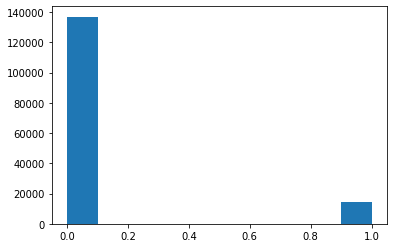

In [360]:
plt.hist(df_train.target)

In [371]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df_train.drop(columns=['target']), df_train.target)

In [136]:
print(sorted(Counter(y_resampled).items()))

[(0, 136947), (1, 136947)]


(array([136947.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 136947.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

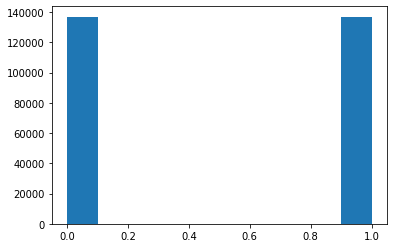

In [363]:
plt.hist(y_resampled)

## CATBOOST

In [40]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [41]:
!pip install shap

     |████████████████████████████████| 564 kB 4.6 MB/s 


In [123]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from xgboost import XGBClassifier
import shap

In [364]:
cat_vars = [var for var in df_train.columns if df_train[var].dtype == "O"]

In [44]:
cat_vars

['variable_1',
 'variable_5',
 'variable_20',
 'variable_21',
 'variable_22',
 'variable_28']

In [365]:
fts_cols = df_train.columns.values.tolist()[:-1]

In [367]:
fts_cols = ['variable_1',
#  'variable_2',
 'variable_4',
 'variable_5',
 'variable_6',
#  'variable_8',
 'variable_10',
#  'variable_11',
 'variable_13',
 'variable_14',
 'variable_18',
 'variable_19',
 'variable_20',
 'variable_21',
 'variable_22',
 'variable_23',
#  'variable_24',
#  'variable_25',
#  'variable_26',
 'variable_27',
 'variable_28',
 'variable_4_sqr',
 'variable_6_sqr',
 'variable_13_sqr',
 'variable_14_sqr',
 'variable_18_sqr',
 'variable_19_sqr']

In [368]:
cat = CatBoostClassifier(iterations=1000,
                          # learning_rate = 0.1,
                          early_stopping_rounds=30,
                          depth=4,
                          cat_features=cat_vars,
                          random_state=79637,
                          verbose = 10)

In [372]:
X = X_resampled[fts_cols]
y = y_resampled

In [373]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X_resampled[fts_cols],y_resampled, test_size = 0.2)

In [374]:
cat.fit(X_train,y_train)

Learning rate set to 0.102897
0:	learn: 0.6741656	total: 426ms	remaining: 7m 5s
10:	learn: 0.6057302	total: 4.32s	remaining: 6m 28s
20:	learn: 0.5639329	total: 7.91s	remaining: 6m 8s
30:	learn: 0.5480898	total: 11.8s	remaining: 6m 9s
40:	learn: 0.5310184	total: 15.6s	remaining: 6m 5s
50:	learn: 0.5218967	total: 19.5s	remaining: 6m 3s
60:	learn: 0.5154079	total: 23.2s	remaining: 5m 57s
70:	learn: 0.5103789	total: 27.3s	remaining: 5m 57s
80:	learn: 0.5069950	total: 29.5s	remaining: 5m 34s
90:	learn: 0.5022505	total: 31.8s	remaining: 5m 17s
100:	learn: 0.4995916	total: 34.1s	remaining: 5m 3s
110:	learn: 0.4979504	total: 36.2s	remaining: 4m 50s
120:	learn: 0.4945818	total: 38.5s	remaining: 4m 39s
130:	learn: 0.4924391	total: 40.8s	remaining: 4m 30s
140:	learn: 0.4903594	total: 43s	remaining: 4m 21s
150:	learn: 0.4884416	total: 45.4s	remaining: 4m 14s
160:	learn: 0.4868897	total: 47.7s	remaining: 4m 8s
170:	learn: 0.4835306	total: 50.1s	remaining: 4m 2s
180:	learn: 0.4798419	total: 52.5s	re

In [378]:
preds_train = cat.predict(X_train)
preds_test = cat.predict(X_test)

In [379]:
pd.Series(cat.feature_importances_, index=fts_cols).sort_values(ascending=False)

variable_13        16.136672
variable_27        13.912443
variable_22         9.429809
variable_19         8.746025
variable_18         8.715303
variable_18_sqr     7.410468
variable_19_sqr     7.289991
variable_1          7.217574
variable_14         6.047474
variable_14_sqr     4.939271
variable_20         3.652137
variable_13_sqr     1.466575
variable_4          1.284953
variable_5          1.110077
variable_6          0.893093
variable_21         0.414953
variable_23         0.331676
variable_4_sqr      0.319743
variable_6_sqr      0.290585
variable_10         0.208407
variable_28         0.182770
dtype: float64

In [390]:
explainer = shap.TreeExplainer(cat)

In [391]:
shap_values = explainer.shap_values(X_resampled[fts_cols])

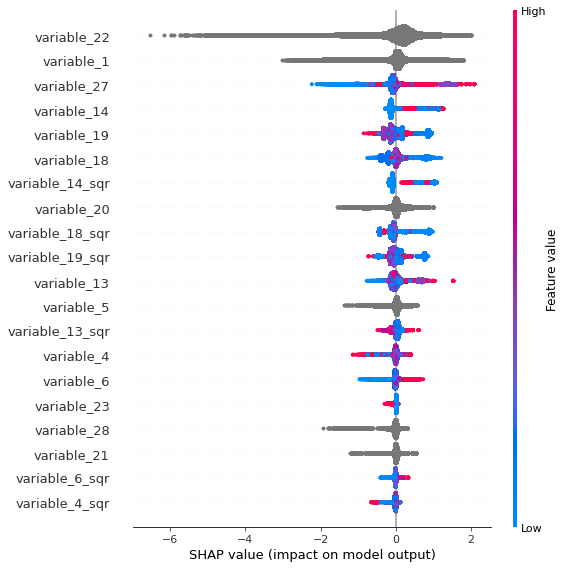

In [392]:
shap.summary_plot(shap_values, X_resampled[fts_cols])

In [380]:
mean_squared_error(preds_train,y_train)

0.17336558428222623

In [381]:
mean_squared_error(preds_test,y_test)

0.18487011445992077

In [382]:
probs = cat.predict_proba(X_test[fts_cols])
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

No handles with labels found to put in legend.


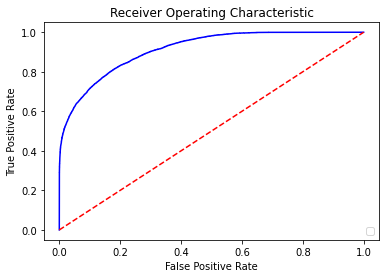

In [383]:
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [384]:
metrics.roc_auc_score(y_test,preds)

0.9128554707601346

In [385]:
submitions = cat.predict(df_test[fts_cols])

In [386]:
res = pd.DataFrame(submitions)

In [387]:
# res = pd.DataFrame(submitions)
res = pd.concat([df_test.id,res],axis=1).set_index('id')
# 

In [388]:
res.columns=['target']

In [389]:
res.to_csv('submission_cat.csv')